# 네트워크

## 문제
네트워크란 컴퓨터 상호 간에 정보를 교환할 수 있도록 연결된 형태를 의미. 예를 들어, 컴퓨터 A와 컴퓨터 B가 직접적으로 연결되어있고, 컴퓨터 B와 컴퓨터 C가 직접적으로 연결되어 있을 때 컴퓨터 A와 컴퓨터 C도 간접적으로 연결되어 정보를 교환할 수 있음. 따라서 컴퓨터 A, B, C는 모두 같은 네트워크 상에 있다고 할 수 있음. 컴퓨터의 개수 n, 연결에 대한 정보가 담긴 2차원 배열 computers가 매개변수로 주어질 때, 네트워크의 개수를 return
<br><br>
input : n = 정수, computers = 2차원 정수 배열, output : 정수

#### <조건>
 - 컴퓨터의 개수 n은 1 이상 200 이하인 자연수
 - 각 컴퓨터는 0부터 n-1인 정수로 표현
 - i번 컴퓨터와 j번 컴퓨터가 연결되어 있으면 computers[i][j]를 1로 표현
 - computer[i][i]는 항상 1
 
#### <예시>
input : n = 3, computers = [[1, 1, 0], [1, 1, 0], [0, 0, 1]]	
<br><br>
result : 2
<br><br>
 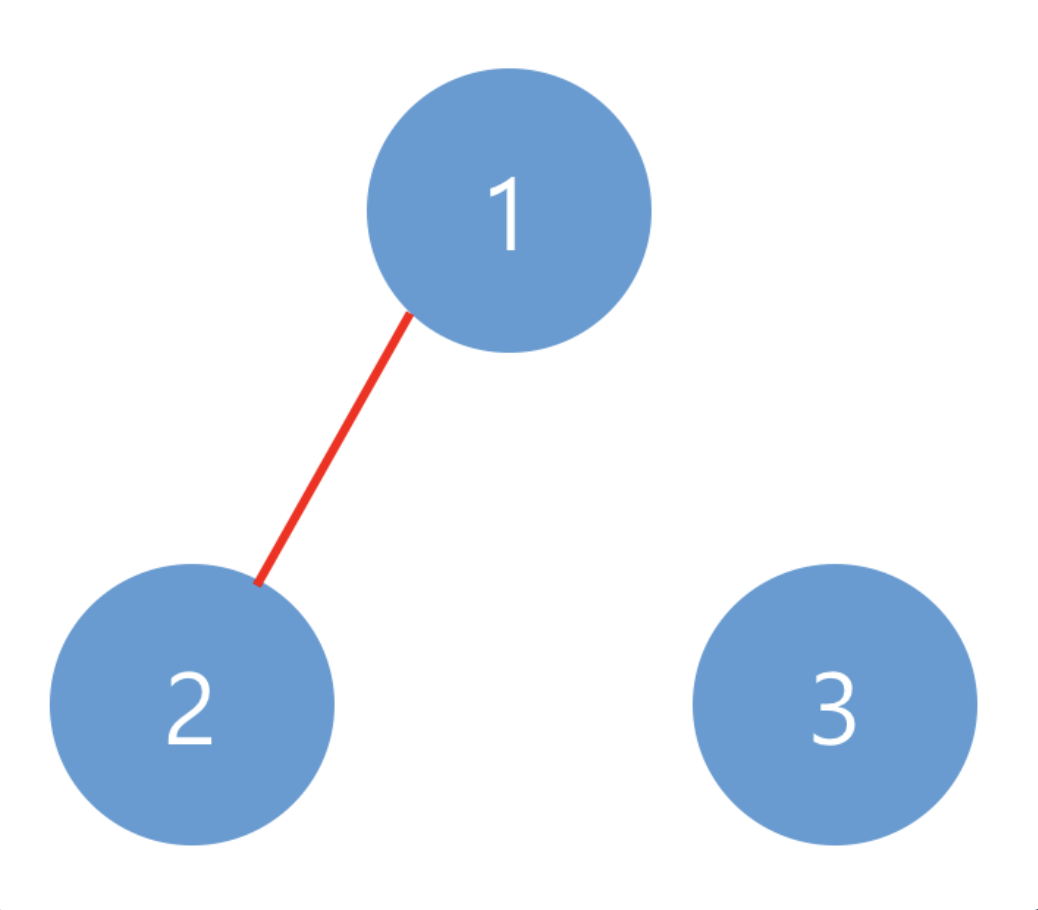
 - 그림과 같이 총 2개의 네트워크가 존재
 
https://programmers.co.kr/learn/courses/30/lessons/43162

## 풀이
 - 연결된 네트워크의 인접리스트 생성
 - 연결된 컴퓨터가 없는 경우에는 인접리스트에 들어가지 않기에 따로 answer에 추가
 - 인접리스트의 key값을 computer에 리스트 형태로 저장
 - computer에 값이 없을 때까지 dfs를 반복
   - computer의 첫번째 인덱스를 시작으로 dfs 수행
   - 수행하고 나온 방문 컴퓨터 리스트를 computer에서 제거하면 해당 네트워크에 속하지 않은 컴퓨터만 남음
   - 네트워크의 개수를 +1 해줌
   - 네트워크가 존재하는 모든 컴퓨터를 다 dfs수행할 떄까지 반복
 - 반복이 끝나면 누적된 네트워크의 개수를 return 

In [1]:
def solution(n, computers):
    computer_dict = dict()
    
    for i in range(len(computers)):
        for j in range(n):
            if computers[i][j] == 1 and i != j:
                if i+1 in computer_dict:
                    computer_dict[i+1].append(j+1)
                else:
                    computer_dict[i+1] = [j+1]
    
    answer = n - len(computer_dict)
    computer = list(computer_dict.keys())
    
    while computer:
        computer = set(computer) - set(dfs(computer_dict, computer[0]))
        computer = list(computer)
        answer += 1
        
    return answer

def dfs(computer_dict, start):
    visited = []
    queue = [start]
    
    while queue:
        node = queue.pop()
        
        if node not in visited:
            visited.append(node)
            queue.extend(computer_dict[node])
            
    return visited

In [2]:
n = 4
computers = [[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1]]

solution(n, computers)

2